In [1]:
import sys
print(sys.executable)
import torch
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from navrep.envs.navreptrainenv import NavRepTrainEnv
from navrep.envs.roomgen import Room, split_room
rng = np.random.default_rng(12345)

/home/mads/miniconda3/envs/NavRepEnv/bin/python


/home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mads/miniconda3/envs/NavRepEnv/lib

In [2]:
room_h = 15
room_w = 12

main_room = np.array([[room_w,room_h],[-room_w,room_h],[-room_w,-room_h],[room_w,-room_h]])/2
r = Room.from_vert(main_room)

In [3]:
room_h = 50
room_w = 50

main_room = np.array([[room_w,room_h],[-room_w,room_h],[-room_w,-room_h],[room_w,-room_h]])/2
main_room = Room.from_vert(main_room)

axis = 1
corridor_w = 1.5
corridor_num = 6

rooms = []

rooms.append(main_room)
split = main_room.split_room(axis, corridor_w)
rooms=[r for r in split if r.get_area() > 1 and min(r.dim[0],r.dim[1]) > 1.5]


# Creates corridors
for i in range(corridor_num):
    axis = 1 - axis
    corridor_w *= 0.9
    num = len(rooms)
    for i in range(num):
        room = rooms.pop(0)
        split = room.split_room(axis, corridor_w)
        split = [r for r in split if r.get_area() > 2 and min(r.dim[0],r.dim[1]) > 1.5]
        rooms+= split if split else [room]
    r_idx = np.argsort([r.get_area() for r in rooms])#np.arange(len(rooms))
    rooms = [rooms[i] for i in r_idx]
    
# split big rooms
big_rooms = [i for i,r in enumerate(rooms) if r.get_area() > 30 and r.corridor_sides]

removed = []
while big_rooms:
    for i, br_idx in enumerate(big_rooms):
        room = rooms.pop(br_idx-i)
        axis = np.argmax(room.dim)
        #print(room.get_corridor_sides())
        if not any(axis == np.mod(room.get_corridor_sides(),2)):
            #print("flip")
            axis = 1 - axis
        for j in range(4):
            split = room.split_room(axis, 0)
            split_if = [r.get_area() > 2 and min(r.dim[0],r.dim[1]) > 1.5 for r in split]
            if all(split_if):
                rooms+= split
                break
            if j==3:
                removed += [room]
    big_rooms = [i for i,r in enumerate(rooms) if r.get_area() > 30 and r.corridor_sides]
rooms += removed

collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision


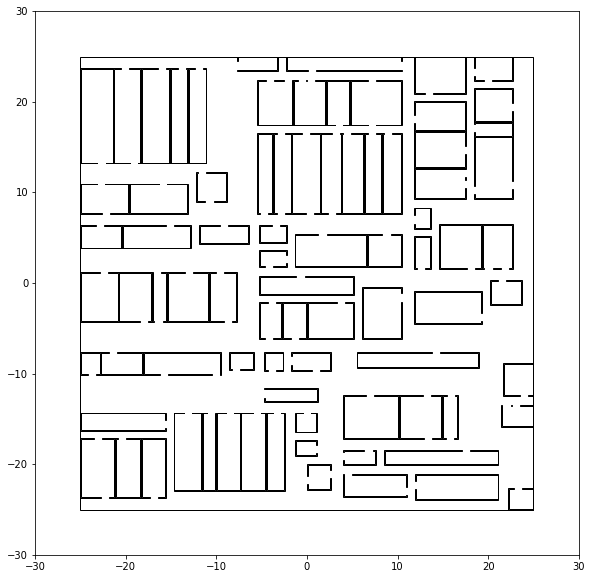

In [4]:
plot_rooms = [main_room]+rooms
fig, ax = plt.subplots(figsize=[10,10])
for r in plot_rooms:
    if r.door:
        for p in r.get_polygons():
            polygon = Polygon(np.array(p), fill=False)
            ax.add_patch(polygon)
            #ax.plot(r.door[0][0][:,0], r.door[0][0][:,1], '.')
    else:
        polygon = Polygon(r.get_vert(), fill=False)
        ax.add_patch(polygon)
    
plt.xlim([-30,30])
plt.ylim([-30,30])
ax.set_aspect('equal', 'box')
plt.show()

In [5]:
test_room = Room(6,4,[1,1])

In [6]:
test_room.set_corridor_sides([1,2])
test_room.add_door()
test_room.add_door()
test_room.add_door()

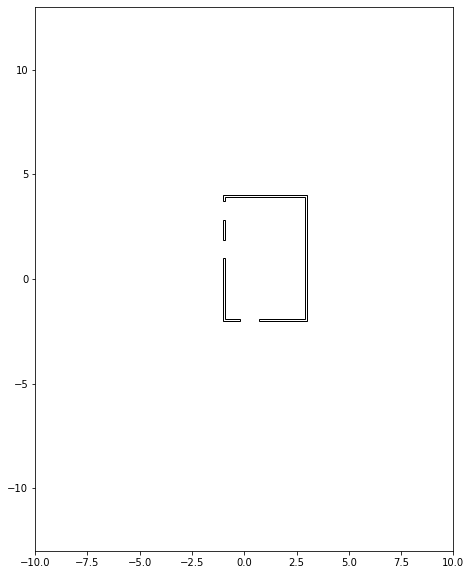

In [7]:
fig, ax = plt.subplots(figsize=[10,10])
for p in test_room.get_polygons():
    polygon = Polygon(p, fill=False)
    ax.add_patch(polygon)
plt.xlim([-10,10])
plt.ylim([-13,13])
ax.set_aspect('equal', 'box')
plt.show()